<img src="https://logodownload.org/wp-content/uploads/2019/10/inpe-logo.png" align="left" width="54"/>
<img src="https://i1.rgstatic.net/ii/lab.file/AS%3A1014813043986433%401618961692303_xl" align="right" width="74" />

<h1 style="color:#336699; text-align: center" >Extract Phenological Metrics</h1>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Grazieli Rodigheri
    <sup>
        <a href="https://orcid.org/0000-0002-9916-1167">
            <i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i>
        </a>
    </sup>
    <br/>
    <br/>
    Remote Sensing Postgraduate Program (PGSER), National Institute for Space Research (INPE)
    <br/>
    <br/>
    Contact: 
    <a href="mailto:grazielirodigheri@gmail.com">grazielirodigheri@gmail.com</a>
    <br/>
    <br/>
    <div style="width: 98%;">
        <div style="text-align: justify; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 10px;">
            <b>This code is associated to the paper:</b>
            <div>
                Grazieli Rodigheri, Ieda Del’Arco Sanches, Jonathan Richetti, Rodrigo Yoiti Tsukahara, Roger Lawes, Hugo do Nascimento Bendini, Marcos Adami. <a href="https://www.mdpi.com/2072-4292/15/22/5366" target="_blank">Estimating Crop Sowing and Harvesting Dates Using Satellite Vegetation Index: A Comparative Analysis</a>, <i> Remote Sensing</i>, 15(22), 5366, 2023.
            </div>
        </div>
    </div>
</div>

<hr style="border:1px solid #0077b9;">

### Load libraries

In [1]:
library("dplyr")
library("ggplot2")

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.2.3"


<hr style="border:1px solid #0077b9;">

### Import pre-processing and extract functions

In [2]:
# Import extract functions
source("R/get_phenometrics.R")

# Import mutate functions
source("R/preprocessing_functions.R")

Carregando pacotes exigidos: foreign

Carregando pacotes exigidos: raster

Warning message:
"package 'raster' was built under R version 4.2.3"
Carregando pacotes exigidos: sp

Warning message:
"package 'sp' was built under R version 4.2.3"

Attaching package: 'raster'


The following object is masked from 'package:dplyr':

    select


Carregando pacotes exigidos: maptools

Checking rgeos availability: TRUE
Please note that 'maptools' will be retired during 2023,
plan transition at your earliest convenience;
some functionality will be moved to 'sp'.

Carregando pacotes exigidos: shapefiles


Attaching package: 'shapefiles'


The following objects are masked from 'package:foreign':

    read.dbf, write.dbf


Carregando pacotes exigidos: rgdal

Please note that rgdal will be retired during 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2022/04/12/evolution.html and https://github.com/r-spatial/evolution
rgda

<hr style="border:1px solid #0077b9;">

### Define example time-series

In [3]:
# Examples series MOD13Q1
serie_MOD13_ex1 <- c(0.378, 0.348, 0.346, NA, 0.374, 0.291, 0.406, 0.598, 0.829, 0.92, 0.937, NA, 0.401, 0.325, 0.461, 0.609, 0.738)

serie_MOD13_ex2 <- c(0.301, 0.309, 0.388, 0.635, 0.74, 0.9, 0.882, 0.508, NA, 0.367, 0.622, 0.838, 0.846, 0.749, 0.353, 0.31, 0.299)

serie_MOD13_ex3 <- c(0.689, 0.632, 0.39, 0.296, 0.298, 0.564, 0.81, NA, NA, 0.919, 0.914, 0.811, 0.661, 0.456, 0.518, 0.5, 0.507)

# Examples series Sentinel-2
serie_S2_ex1 <- c(0.257, 0.249, 0.265, 0.262, 0.145, 0.269, 0.277, 0.278, 0.278, 0.276, NA, 0.074, NA, NA, 0.281, 0.266, NA, NA, 0.218, 0.211, 0.198, NA, NA, NA, 0.119, 0.146, 0.13, 0.124, 0.173, 0.149, 0.129, 0.134, NA, NA, 0.191, NA, NA, 0.23, NA, NA, NA, 0.208, NA, NA, 0.622, NA, 0.631, NA, NA, 0.861, NA, NA, NA, NA, 0.912, 0.933, 0.927, NA, NA, NA, NA, NA, NA, 0.904, NA, NA, NA, NA, 0.757, NA, NA, NA, 0.449, NA, 0.175, NA, NA, -0.073, 0.138, 0.112, NA, NA, 0.202, NA, NA, NA, 0.433, 0.542, 0.547, NA, NA, NA, NA, 0.8, 0.872, 0.646, 0.62, 0.903, 0.904, 0.906, NA, NA, NA)

serie_S2_ex2 <- c(0.345, NA, NA, NA, NA, 0.261, 0.217, 0.197, 0.204, NA, NA, NA, 0.281, 0.279, NA, 0.294, NA, 0.389, 0.368, NA, 0.582, NA, NA, 0.771, 0.762, 0.847, NA, 0.914, NA, 0.907, NA, NA, 0.833, 0.93, 0.924, NA, NA, NA, 0.913, NA, NA, NA, 0.799, NA, NA, NA, NA, NA, 0.271, 0.203, 0.18, NA, 0.173, 0.273, NA, NA, 0.36, NA, 0.401, NA, 0.525, NA, NA, NA, NA, 0.733, 0.329, 0.872, NA, 0.909, 0.898, NA, 0.918, 0.94, 0.823, NA, 0.721, 0.911, 0.934, 0.931, 0.935, NA, 0.801, 0.839, 0.925, NA, 0.84, NA, 0.88, NA, 0.733, 0.617, NA, 0.414, 0.34, 0.315, 0.244, 0.219, 0.227, 0.231, 0.231, 0.241, 0.245)


serie <- serie_MOD13_ex1

<hr style="border:1px solid #0077b9;">

### Pre-processing serie

In [60]:
pp_df <- data.frame(raw = serie) %>%
    mutate(date = 1:length(raw)) %>%
    mutate(interpolated = func_int(raw)) %>%
    mutate(smoothed = func_sg(interpolated))
    # tidyr::pivot_longer(cols = !c(date, raw), names_to="variable", values_to = "value")

head(pp_df)

,raw,date,interpolated,smoothed
,<dbl>,<int>,<dbl>,<dbl>
1,0.378,1,0.378,0.3752571
2,0.348,2,0.348,0.3533714
3,0.346,3,0.346,0.3463429
4,NA,4,0.360,0.3669429
5,0.374,5,0.374,0.3404000
6,0.291,6,0.291,0.3266571


Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."


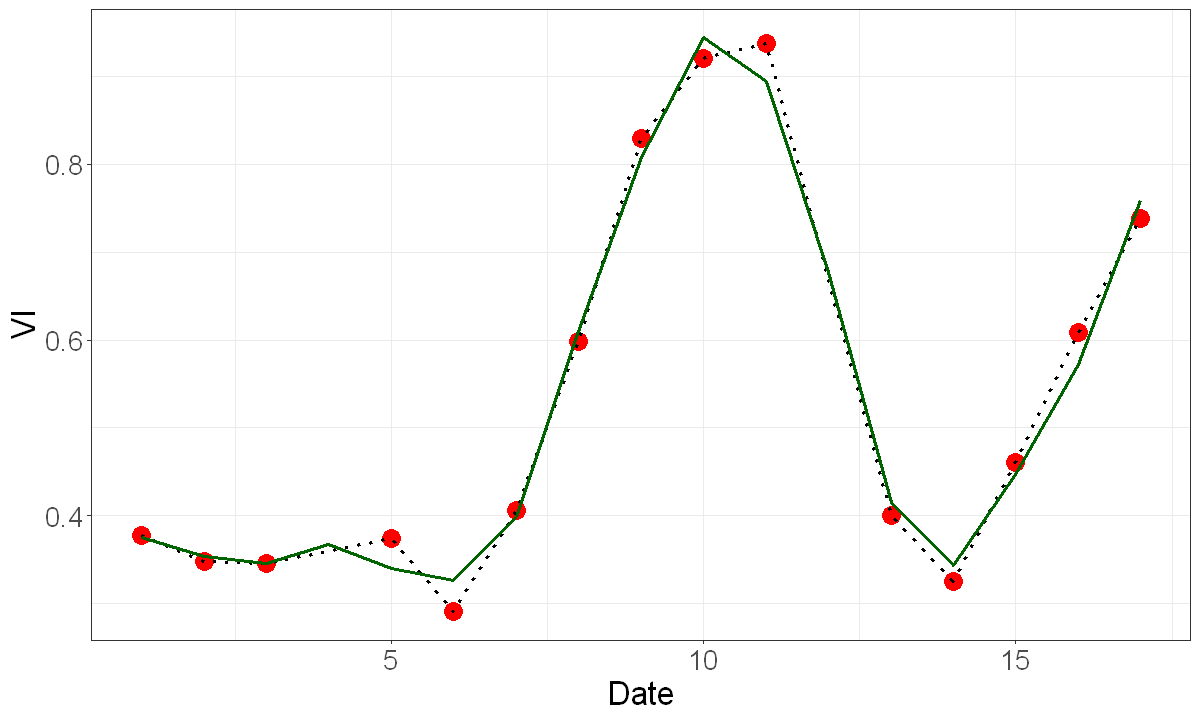

In [72]:
# Plot pre-processed time-series
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data = pp_df) +
    geom_point(
        aes(x = date, y = raw, colour = "raw"), 
        color="red", 
        size=5
    ) +
    geom_line(
        aes(x = date, y = interpolated, colour = "interpolated"), 
        linetype="dotted", 
        color="black", 
        lwd=1
    ) +
    geom_line(
        aes(x = date, y = smoothed, colour = "smoothed"), 
        lwd=1, 
        color="darkgreen"
    ) +
    scale_colour_viridis_d(
        name = "Legend:", 
        option = "turbo"
    ) +
    theme_bw() +
    labs(
        x = "Date", 
        y = "VI"
    ) +
    theme(
        text = element_text(size = 20),
        legend.position = 'bottom'
    )

<hr style="border:1px solid #0077b9;">

### Extract metrics

In [73]:
# Get the smoothed time-serie
smoothed <- pp_df$smoothed

In [74]:
# Get metrics using CroPhenology example
get_phenometrics(smoothed, "CP", c(20,30))

# # Get metrics using DEA tools example
# get_phenometrics(smoothed, "DT", c("first", "median"))

# Get metrics using greenbrown example
get_phenometrics(smoothed, "GB", c("deriv", NULL, NULL))
get_phenometrics(smoothed, "GB", c("trs", 0.20, 0.35))
get_phenometrics(smoothed, "GB", c("white", NULL, NULL))

# Get metrics using phenex example
get_phenometrics(smoothed, "PX", c(0.20,0.20))

# Get metrics using phenofit example
get_phenometrics(smoothed, "PF", c("deriv", NULL, NULL))
get_phenometrics(smoothed, "PF", c("trs", 0.20, 0.35))

# Get metrics using TIMESAT example
get_phenometrics(smoothed, "TM", c(0.20,0.20))



CP_sos,CP_eos
<dbl>,<dbl>
6,14


GB_sos,GB_eos
<dbl>,<dbl>
8,13


GB_sos,GB_eos
<dbl>,<dbl>
NA,5


GB_sos,GB_eos
<dbl>,<dbl>
8,NA


PX_sos,PX_eos
<int>,<int>
8,13


PF_sos,PF_eos
<dbl>,<dbl>
6,14


PF_sos,PF_eos
<dbl>,<dbl>
7,14


TM_sos,TM_eos
<dbl>,<dbl>
7,12
